# House Prices using Backward Elimination

Just started with machine learning. I have used backward Elimination to check the usefulness of dependent variables.

In [2]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#importing dataset using panda
dataset = pd.read_csv(r'C:\Users\kumar\.vscode\FULLSTACK DATASCIENCE\MACHINE LEARNING\House Price Predication\House_data.csv')
#to see what my dataset is comprised of
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#checking if any value is missing
print(dataset.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [4]:
#checking for categorical data
print(dataset.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
#dropping the id and date column
dataset = dataset.drop(['id','date'], axis = 1)

C:\Users\kumar\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


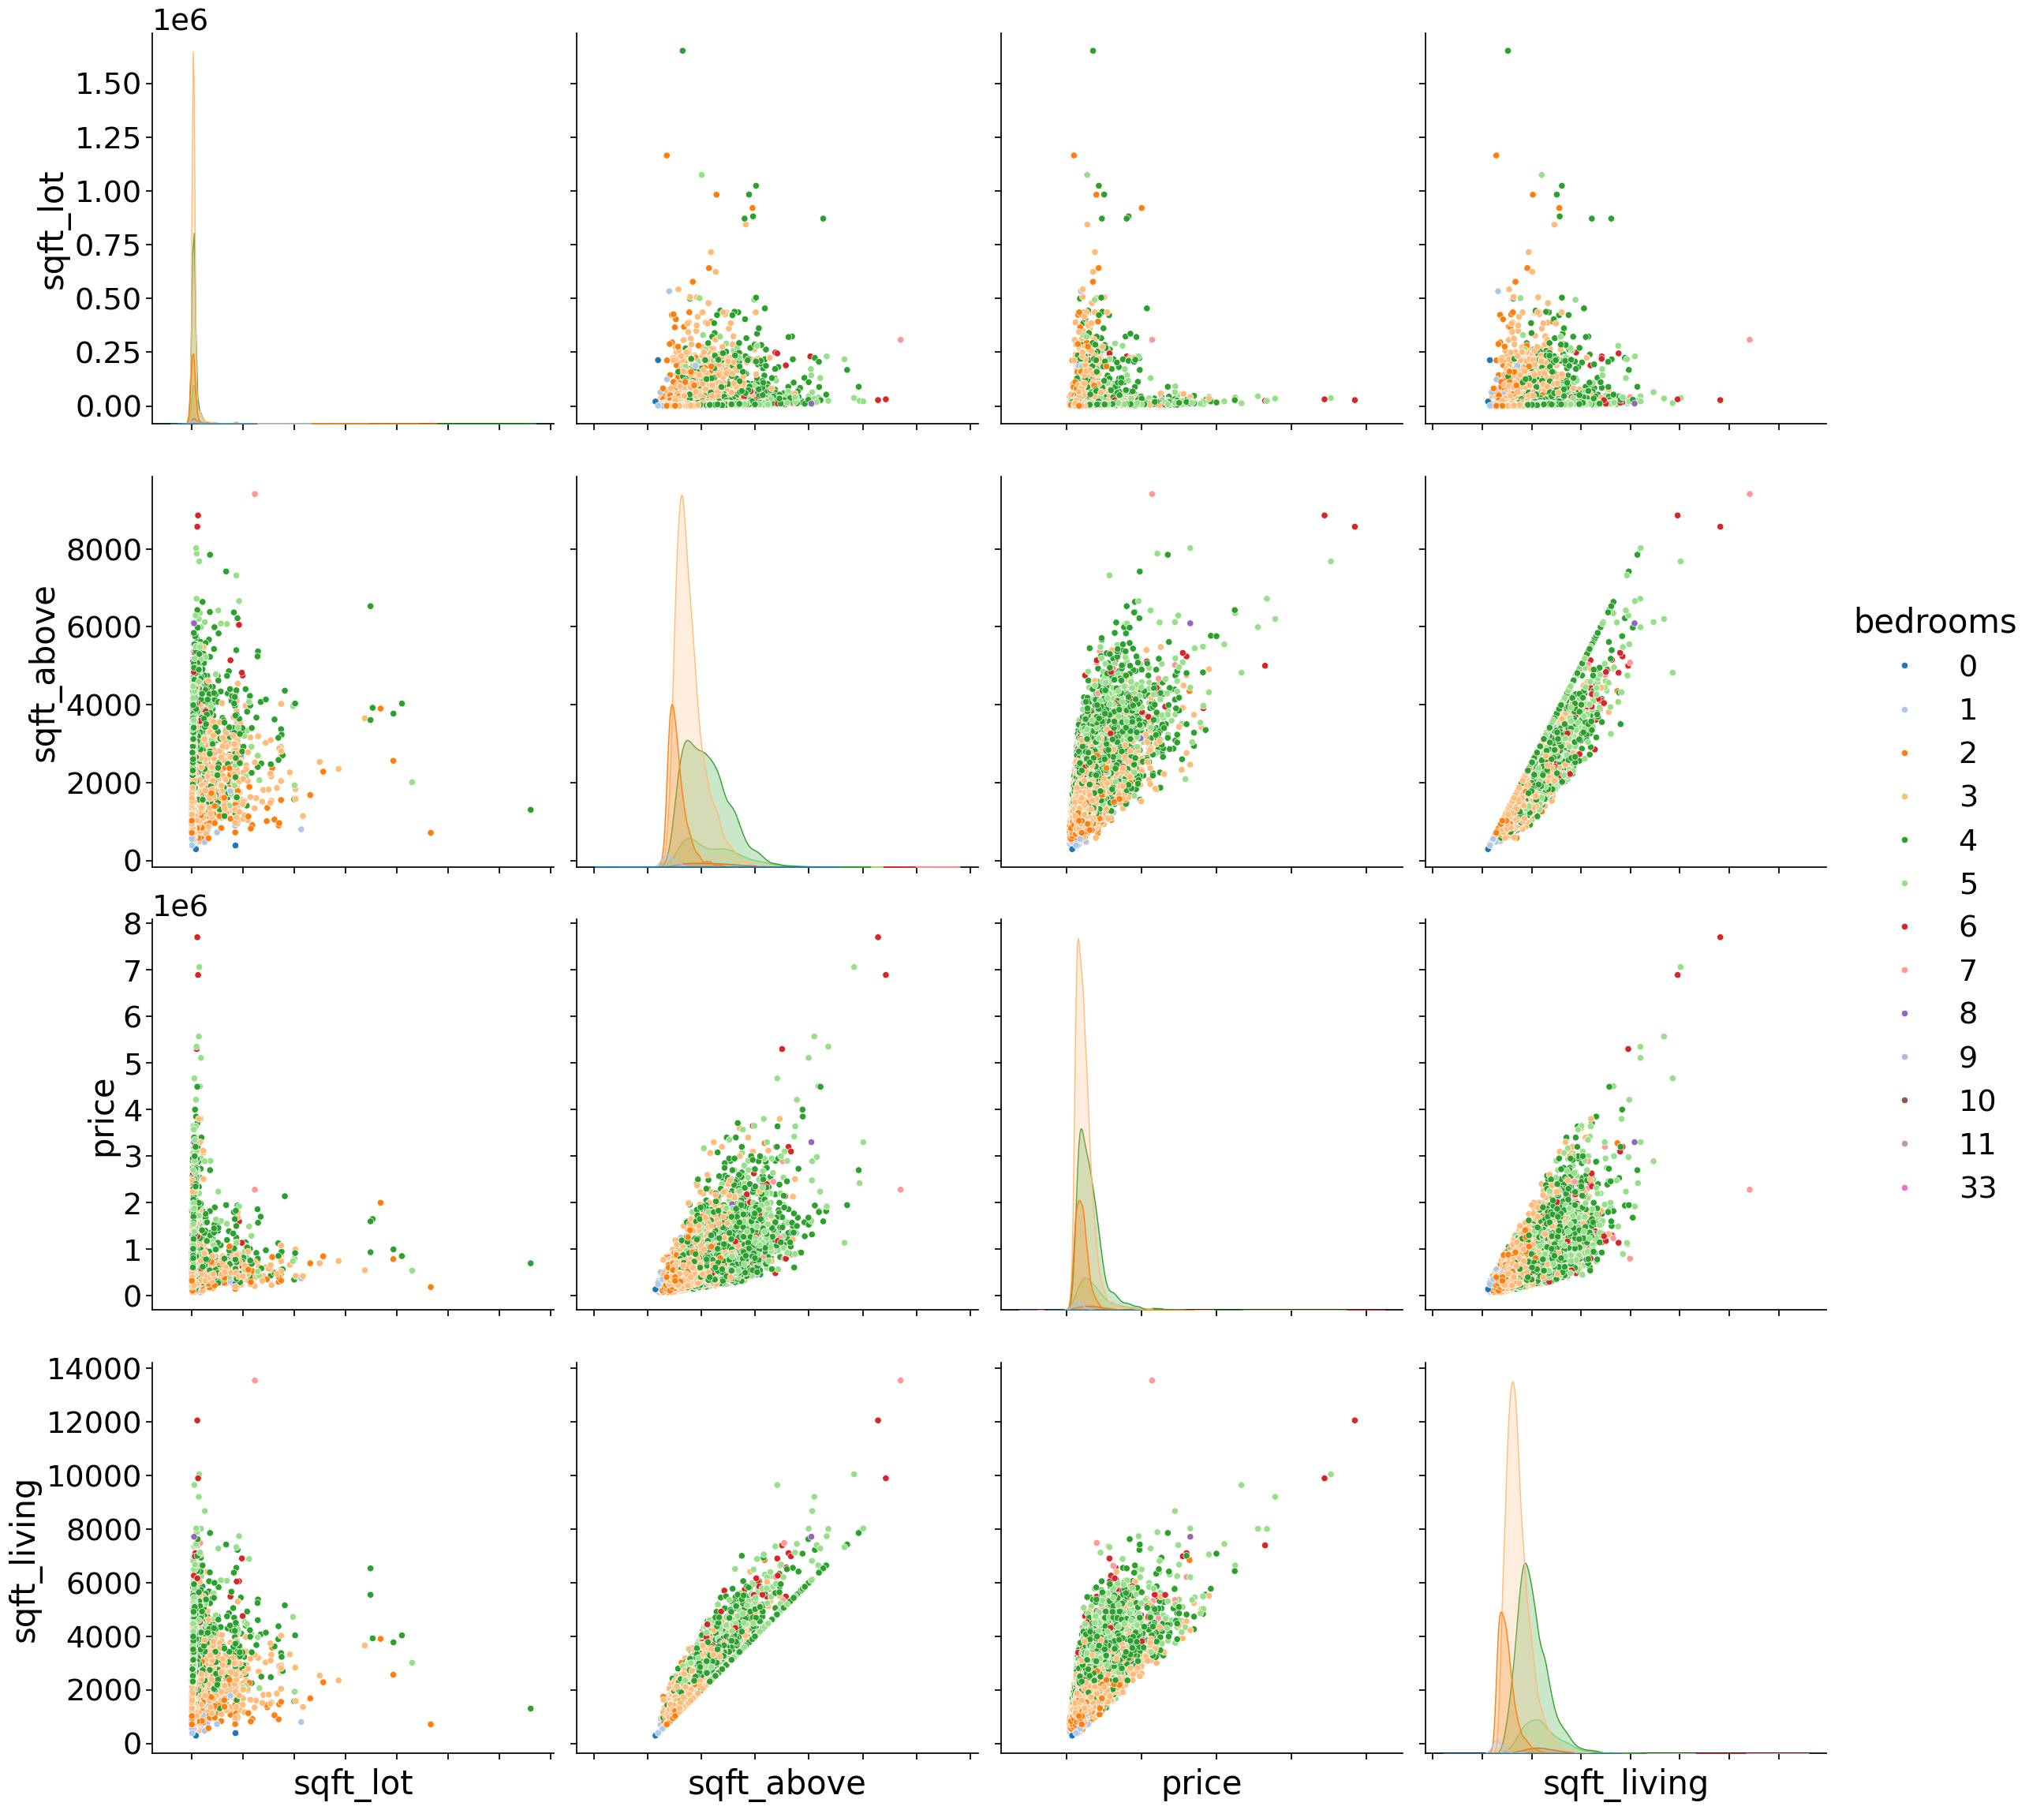

In [6]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

In [9]:
# Separating independent (X) and dependent (y) variables
X = dataset.iloc[:, 1:].values  # Independent variables (excluding the first column)
y = dataset.iloc[:, 0].values  # Dependent variable (first column)

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split  # Corrected import
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Confirm the shapes of the training and testing datasets
#print("Training set shape (X):", X_train.shape)
#print("Testing set shape (X):", X_test.shape)
#print("Training set shape (y):", y_train.shape)
#print("Testing set shape (y):", y_test.shape)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [13]:
#Backward Elimination
import statsmodels.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((21613,19)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17]]
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3140.
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        00:27:34   Log-Likelihood:            -2.9463e+05
No. Observations:               21613   AIC:                         5.893e+05
Df Residuals:                   21596   BIC:                         5.894e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.079e+06   2.93e+06      2.073      0.0

In [12]:
import numpy as np 
import statsmodels.api as sm  # Use `statsmodels.api`, not `statsmodels.formula.api`.

# Define the backward elimination function
def backward_elimination(x, y, sl):
    num_vars = x.shape[1]  # Get the number of variables in x.
    for i in range(0, num_vars):
        regressor_OLS = sm.OLS(y, x).fit()  # Fit the model.
        max_p_value = max(regressor_OLS.pvalues)  # Get the highest p-value.
        if max_p_value > sl:  # Check if the highest p-value is greater than the significance level (SL).
            for j in range(0, x.shape[1]):  # Iterate over all features.
                if regressor_OLS.pvalues[j] == max_p_value:  # If this feature has the max p-value:
                    x = np.delete(x, j, 1)  # Remove the feature.
                    break
        else:
            break  # Exit the loop if no p-value exceeds SL.
    print(regressor_OLS.summary())  # Print the summary of the final model.
    return x  # Return the reduced feature set.

# Adding a constant column for the bias term (required for statsmodels OLS)
X = np.append(arr=np.ones((X.shape[0], 1)).astype(int), values=X, axis=1)

# Set the significance level (SL)
SL = 0.05

# Perform backward elimination
X_modeled = backward_elimination(X, y, SL)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3145.
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        00:27:03   Log-Likelihood:            -2.9462e+05
No. Observations:               21613   AIC:                         5.893e+05
Df Residuals:                   21596   BIC:                         5.894e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.727e+06   2.89e+06      1.983      0.0

Explanation of Changes:
Import Correction:

Use statsmodels.api for the OLS regression instead of statsmodels.formula.api.
Array Handling:

Corrected the way features are removed using np.delete(x, j, 1).
Avoiding Unnecessary Variables:

Removed unused variables like temp.
Breaking Condition:

Exits the loop if all p-values are below the significance level (SL).
Adding a Bias Column:

Used np.append to add a column of ones to X for the constant term required in OLS regression.
How to Run:
Ensure that:
X contains the independent variables as a NumPy array.
y contains the dependent variable as a NumPy array.
Execute the corrected code block in your Python environment.
Example Output:
The function will return:

X_modeled: A reduced feature matrix containing only significant features.
OLS Summary: Printed to show the final model's details, including p-values, R-squared, and adjusted R-squared.